In [6]:
%pip install pandas numpy matplotlib seaborn folium

In [7]:
# Importing required libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Set Seaborn style for better visualizations
sns.set_theme(style="darkgrid")

In [11]:
# Load the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

# Read CSV into DataFrame
df = pd.read_csv(text)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Display first few rows
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,1,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,1980-02-29,1980,2,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,1980-03-31,1980,3,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,1980-04-30,1980,4,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,1980-05-31,1980,5,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


### TASK 1.1: Line Chart for Yearly Automobile Sales

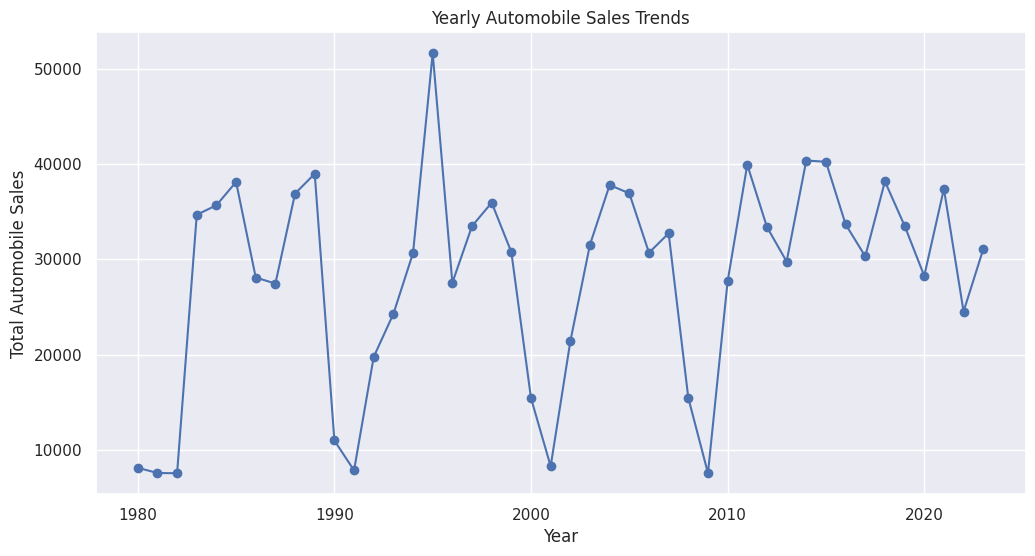

In [12]:
# Group sales data by year
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Total Automobile Sales")
plt.title("Yearly Automobile Sales Trends")
plt.grid(True)
plt.show()

### TASK 1.2: Sales Trend for Different Vehicle Types

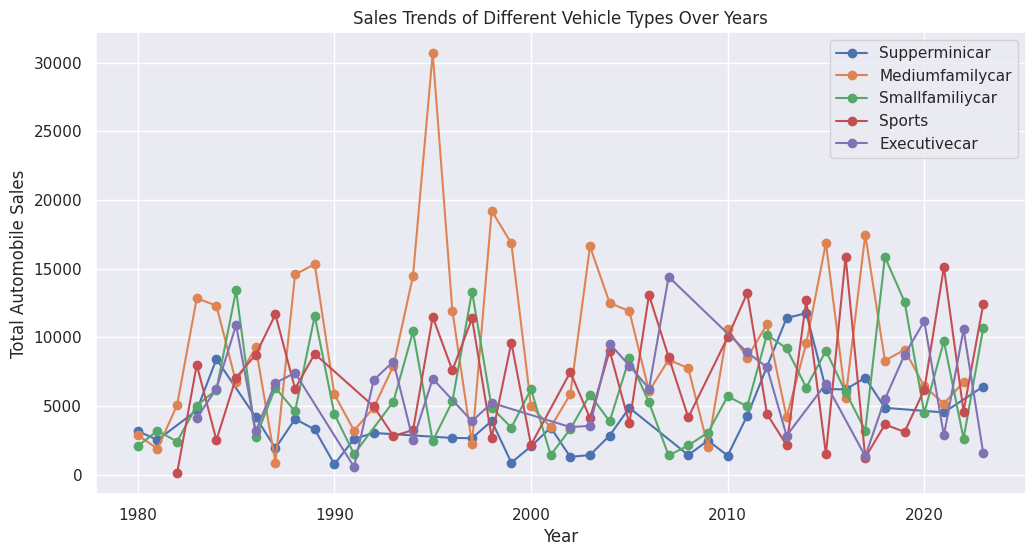

In [13]:
plt.figure(figsize=(12, 6))

# Group by year and vehicle type
for vehicle in df['Vehicle_Type'].unique():
    vehicle_sales = df[df['Vehicle_Type'] == vehicle].groupby('Year')['Automobile_Sales'].sum()
    plt.plot(vehicle_sales.index, vehicle_sales.values, marker='o', label=vehicle)

plt.xlabel("Year")
plt.ylabel("Total Automobile Sales")
plt.title("Sales Trends of Different Vehicle Types Over Years")
plt.legend()
plt.grid(True)
plt.show()

### TASK 1.3: Sales Comparison Between Recession & Non-Recession

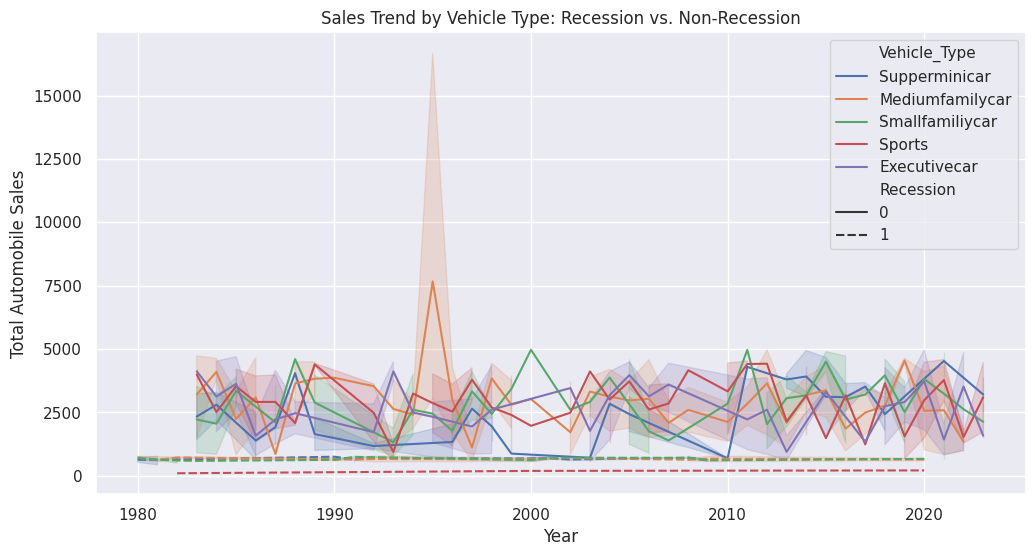

In [14]:
plt.figure(figsize=(12, 6))

# Create a Seaborn line plot
sns.lineplot(data=df, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession')

plt.xlabel("Year")
plt.ylabel("Total Automobile Sales")
plt.title("Sales Trend by Vehicle Type: Recession vs. Non-Recession")
plt.legend()
plt.grid(True)
plt.show()

### TASK 1.4: GDP Variation During Recession & Non-Recession

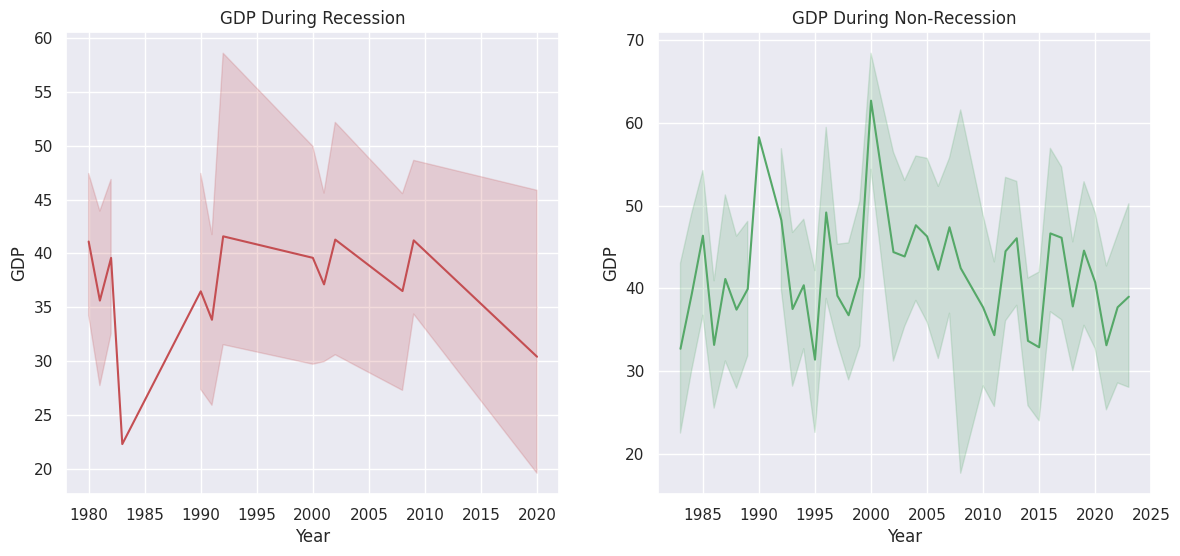

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Recession Period GDP
sns.lineplot(data=df[df['Recession'] == 1], x='Year', y='GDP', ax=ax[0], color='r')
ax[0].set_title("GDP During Recession")

# Non-Recession Period GDP
sns.lineplot(data=df[df['Recession'] == 0], x='Year', y='GDP', ax=ax[1], color='g')
ax[1].set_title("GDP During Non-Recession")

plt.show()


### TASK 1.5: Bubble Plot for Seasonality Impact

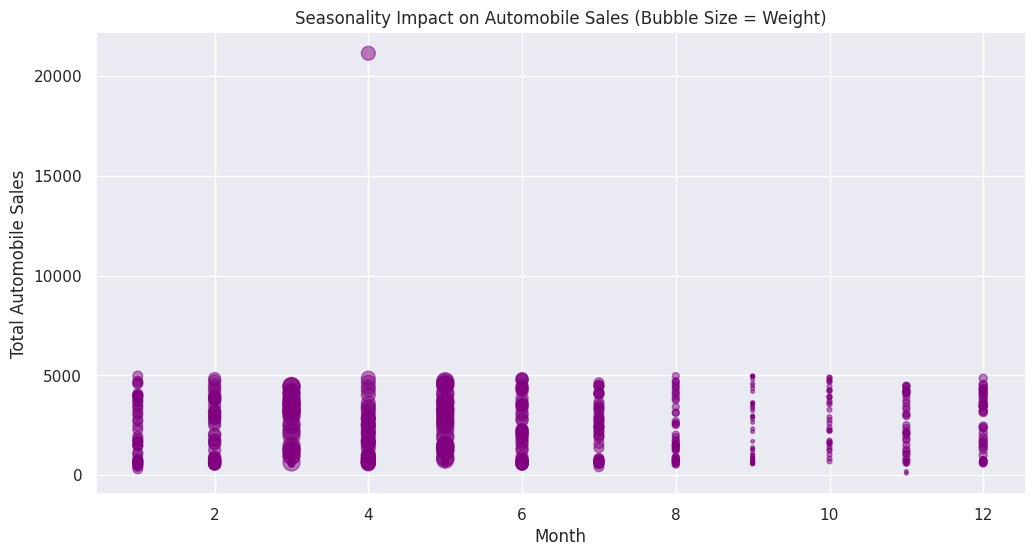

In [16]:
plt.figure(figsize=(12, 6))

# Bubble plot
plt.scatter(df['Month'], df['Automobile_Sales'], s=df['Seasonality_Weight']*100, alpha=0.5, color='purple')

plt.xlabel("Month")
plt.ylabel("Total Automobile Sales")
plt.title("Seasonality Impact on Automobile Sales (Bubble Size = Weight)")
plt.grid(True)
plt.show()

### TASK 1.6: Scatter Plot for Price vs. Sales During Recession

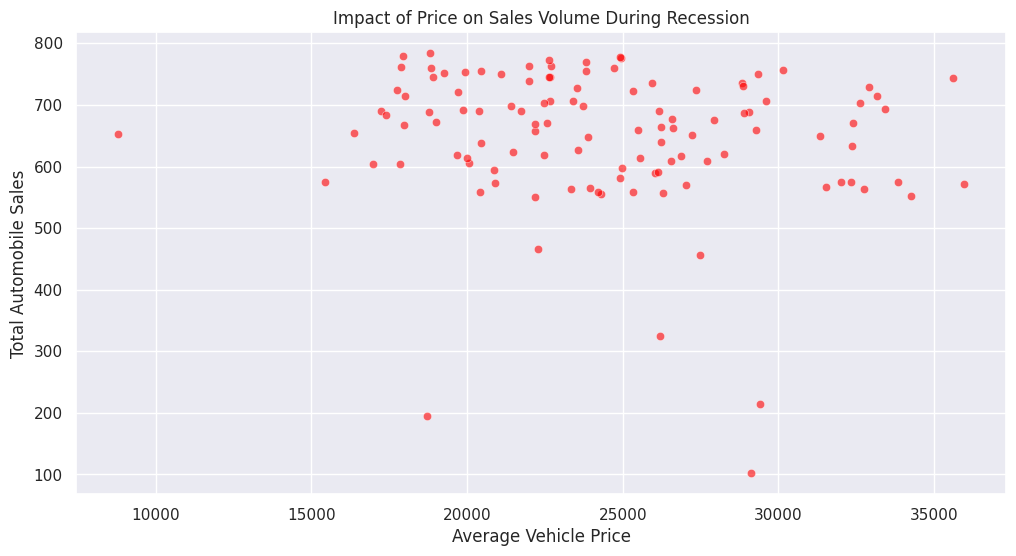

In [17]:
plt.figure(figsize=(12, 6))

# Scatter plot for recession period
sns.scatterplot(data=df[df['Recession'] == 1], x='Price', y='Automobile_Sales', color='red', alpha=0.6)

plt.xlabel("Average Vehicle Price")
plt.ylabel("Total Automobile Sales")
plt.title("Impact of Price on Sales Volume During Recession")
plt.grid(True)
plt.show()

### TASK 1.7: Pie Chart for Advertising Expenditure (Recession vs. Non-Recession)

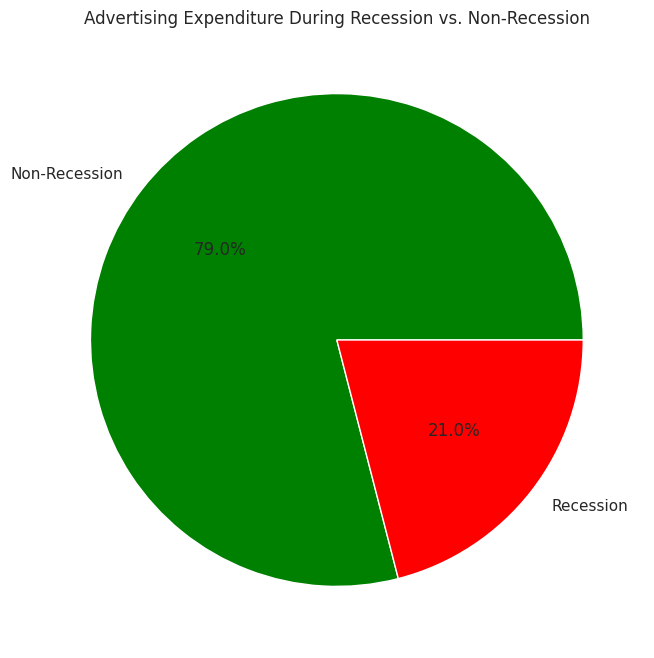

In [18]:
plt.figure(figsize=(8, 8))

# Group by recession and sum advertising expenditure
ad_exp = df.groupby('Recession')['Advertising_Expenditure'].sum()

# Create pie chart
plt.pie(ad_exp, labels=['Non-Recession', 'Recession'], autopct='%1.1f%%', colors=['green', 'red'])

plt.title("Advertising Expenditure During Recession vs. Non-Recession")
plt.show()

### TASK 1.8: Pie Chart for Advertisement Expenditure by Vehicle Type During Recession

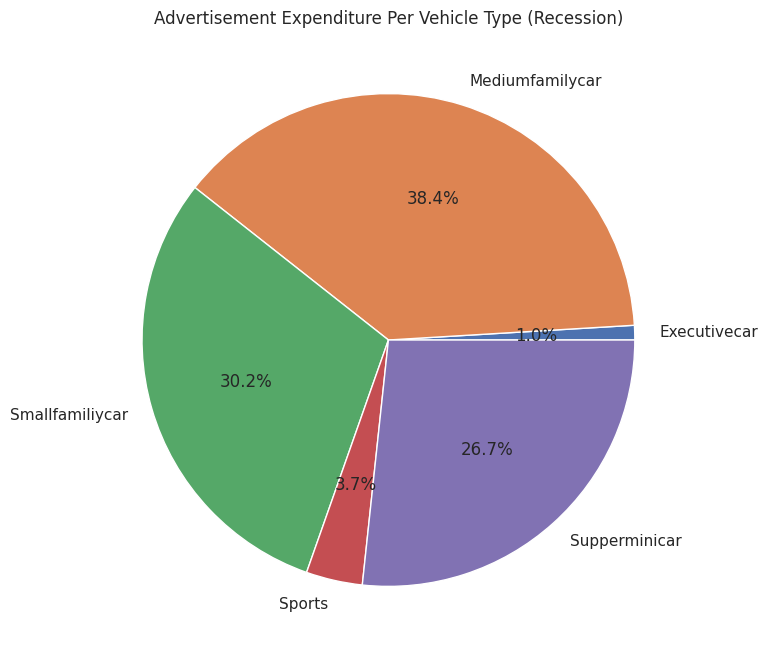

In [19]:
plt.figure(figsize=(8, 8))

# Filter for recession period
ad_exp_recession = df[df['Recession'] == 1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create pie chart
plt.pie(ad_exp_recession, labels=ad_exp_recession.index, autopct='%1.1f%%')

plt.title("Advertisement Expenditure Per Vehicle Type (Recession)")
plt.show()

### TASK 1.9: Line Plot for Unemployment Rate Impact on Vehicle Sales

In [21]:
print(df.columns)

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


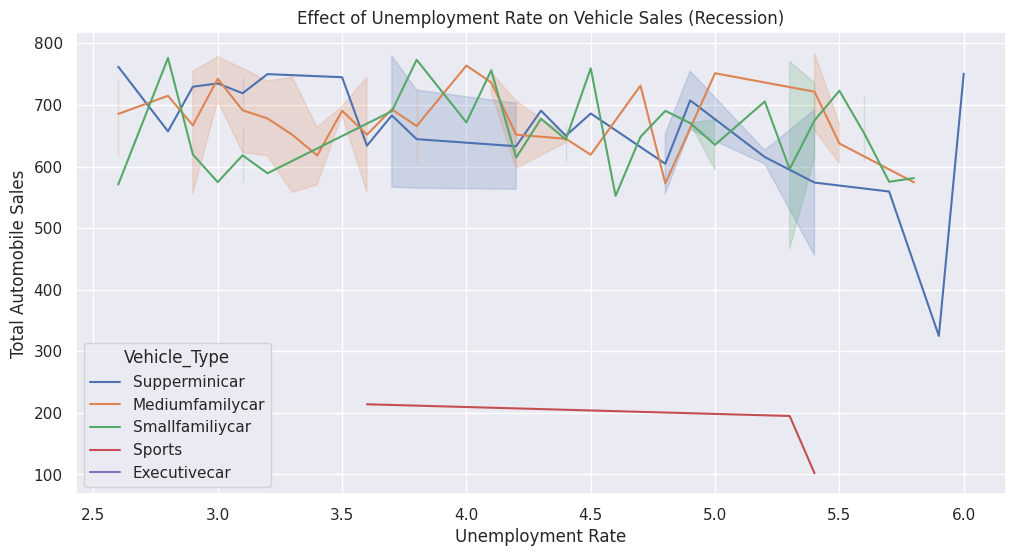

In [22]:
plt.figure(figsize=(12, 6))

# Seaborn line plot for unemployment impact
sns.lineplot(data=df[df['Recession'] == 1], x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type')

plt.xlabel("Unemployment Rate")
plt.ylabel("Total Automobile Sales")
plt.title("Effect of Unemployment Rate on Vehicle Sales (Recession)")
plt.grid(True)
plt.show()